#**Exploring *Biosimulators with biosimulators-copasi***: 
#Python tool for harnessing the abilities of COPASI through a Biosimulators interface.



👁: note the default version of python that is used by Google Colab. Note that the current stable release of python is 3.9, and thus is the version used by Colab. Please keep in mind that forcing colab to point to a newer version of Python will reflect correctly in the command line (!), but colab's sys module will STILL be looking in the default version.

In [ ]:
# verify python version

!python3 --version

Python 3.9.16


##***Step 0***: Install biosimulators-copasi from PyPl.

Note that this will also install the backbone of the Biosimulators framework: biosimulators-utils. 

In [ ]:
# install biosimulators-copasi and verify installation

!pip install biosimulators-copasi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.3/109.3 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 kB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 44.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 528.1/528.1 kB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 35.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.4/137.4 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 306.7/306.7 kB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

If you are ever prompted to restart runtime, run the following cell:

(Note that you will manually have to keep running the cell). I find this to be a very helpful common practice for keeping the kernel fresh with the most recently desired settings, env variables, dependencies, and more.

In [ ]:
# OPTIONAL: restart runtime as per the prompt. Python proc will be killed and runtime automatically restarted by the manager.

import os

os.kill(os.getpid(), 9)

#insert here a run call as well (no extra cell submit)

In [ ]:
# verify newest bioCopasi version as well as backend utils package!


import biosimulators_copasi 
import biosimulators_utils

print(f'\nBIOSIMULATORS_COPASI VERSION: {biosimulators_copasi.__version__}')
print(f'BIOSIMULATORS_UTILS VERSION: {biosimulators_utils.__version__}\n')

/usr/local/lib/python3.9/dist-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.15) or chardet (5.1.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "



BIOSIMULATORS_COPASI VERSION: 0.1.35
BIOSIMULATORS_UTILS VERSION: 0.1.175



#****TO DO: RESOLVE URLLIB3 REQUESTS PYTHON3.9 ISSUE****

###NOTE: When interacting with Biosimulators for Python, it is best practice to make your entrypoint into this framework to be the xml file which specifies simulation parameters. We then shift our perspective to biosimulators utils and feed that xml file into objects therein. We then use those objects as interperative material for whichever model we choose (in this tutorial, we will use biosimulators_copasi.

###***So, the workflow shall be***: 

###.xml file-->
###-->biosimulators_utils.sedml.data_model objects-->
###-->exec_sed_task from respective biosimulators model package.




---


---



---



---



---




#***Situation A***: *Executing time course simulations (e.g., continuous and discrete kinetic simulations)*
###Use BioSimulators-utils to describe the desired simulation. BioSimulators-utils provides several classes for describing simulations which parallel the Simulation Experiment Description Markup Language (SED-ML).

###**These classes utilize three ontologies**:

* Modeling formats: SED-ML model language URNs
* Outputs of implicit simulation variables: SED-ML symbol URNs
* Simulation algorithms and their parameters: Kinetic Simulation Algorithm Ontology (KiSAO)




##***Step 1***: Upload relevant .xml simulation file which defines task and model:

👁 Define the path to the relevant XML file for your variable/task output. Use the next cell to upload a file of your own into the working directory, otherwise skip the next cell and use the following one to clone our test suite, which contains a multitude of example COMBINE archives, sedml, xml, and h5 files. Here we provide two methods:

In [ ]:
# METHOD A: to upload your own xml file

from google.colab import files 

files.upload()

In [ ]:
# METHOD B: to use an example file from our test suite repo. 
 #Keep in mind that biosimulators-copasi and COPASI in general uses SBML, so we will reference SBML-core from the repo.

!git clone https://github.com/biosimulators/Biosimulators_test_suite.git

Cloning into 'Biosimulators_test_suite'...
remote: Enumerating objects: 6834, done.
remote: Counting objects: 100% (173/173), done.
remote: Compressing objects: 100% (132/132), done.
remote: Total 6834 (delta 65), reused 113 (delta 32), pack-reused 6661
Receiving objects: 100% (6834/6834), 55.46 MiB | 29.52 MiB/s, done.
Resolving deltas: 100% (4780/4780), done.


👁 Define a path for the xml source regardless  of which method you choose. Note that our test suite repo comes complete with all tools available to test specific model methods.

##***Step 2***: Import required data model objects from biosimulators-utils sedml submodule:

In [ ]:
from typing import Dict, List, Tuple
import pandas as pd 
from biosimulators_utils.sedml.data_model import Task, Model, ModelLanguage, \
                                                 UniformTimeCourseSimulation, Algorithm, \
                                                 Variable, Symbol

For example, use these classes to describe a 10-time unit simulation of the continuous kinetic (SBO_0000293) Ciliberto et al. morphogenesis checkpoint model using the Systems Biology Markup Language (SBML) format (EDAM:format_2585, SED-ML model language URN: sbml) and the CVODE algorithm (KISAO_0000019) with the predicted variables recorded at the initial time point and at 10 additionally uniformly spaced steps from the initial time (0) to the final time (10).

##***Step 3***: Define an instance of a biosimulator_utils Task():

We can define a number of parameters for this Task object. 

***First***, there are required working keywork arguments that we define such as:*


*   define the path to the xml (here, we will pick a 'random' xml)
*   the working language that we desire of the model
*   and the id of the algorithm involved


***Second***, since we desire a time-course simulation with 10 time units, we will define:*



*   the initial start time,
*   output startime for event listener,
*   ouput endtime
*   and the number of time steps, in this case 10




These can all be delightfully stored in a python dictionary or hash-table like object. Here I propose a number of methods to do so:

In [ ]:
#...or we can create a setup_params dict (preferred)


setup_params = {
    'xml': "/content/Biosimulators_test_suite/examples/sbml-core/Ciliberto-J-Cell-Biol-2003-morphogenesis-checkpoint-continuous/BIOMD0000000297_url.xml",
    'working_lang': ModelLanguage.SBML.value,
    'init_time': 0.,
    'output_start': 0.,
    'output_end': 10.,
    'num_steps': 10,
    'alg_id': 'KISAO_0000019'
}

###You might be wondering, "but the documentation says that task takes two other objects as arguments, and none of them are what you just defined!  That is correct! To truly instantiate a biosimulators-utils task, you must define the following objects with the following parameters as input:



###1.   **model**:
*   xml_path
*   working_language

###2.   **simulation**:


*   temporal objects: init time, start time, end time etc
*   alg_id (KISAO id)











Keep in mind that K.I.S.A.O stands for [Kinetic Simulation Algorithm Ontology](https://www.ebi.ac.uk/ols/ontologies/kisao), which is a classification of algorithms for simulating biology, their parameters, and their outputs.

##***Step 3a***: Define the Model

In [ ]:
#at very least, define source for model file and model language

sim_model = Model(
    source=setup_params['xml'],
    language=setup_params['working_lang']
)

##***Step 3b***: Define the Simulation. We can first describe the used algorithm with an Alogrithm object

In [ ]:
#Here we will define what time of simulation we desire. In this example, we are dealing with temporal 
    #space, so we will define this simulation as a UniformTimeCourseSimulation which has its own properties


simulation_algorithm = Algorithm(kisao_id=setup_params['alg_id'])


simulation_schema = UniformTimeCourseSimulation(
    initial_time=setup_params['init_time'], 
    output_start_time=setup_params['output_start'],
    output_end_time=setup_params['output_end'],
    number_of_steps=setup_params['num_steps'],
    algorithm=simulation_algorithm
)

View the overall mapping proxy of the Abstract class to understand the properties of the object you just instantiated. 

In [ ]:
# generate internal object mapping

vars(UniformTimeCourseSimulation)

mappingproxy({'__module__': 'biosimulators_utils.sedml.data_model',
              '__doc__': ' A uniform time course simulation\n\n    Attributes:\n        id (:obj:`str`): id\n        name (:obj:`str`): name\n        algorithm (:obj:`Algorithm`): algorithm\n        initial_time (:obj:`float`): initial time\n        output_start_time (:obj:`float`): output start time\n        output_end_time (:obj:`float`): output end time\n        number_of_steps (:obj:`int`): number of time steps\n    ',
              '__init__': <function biosimulators_utils.sedml.data_model.UniformTimeCourseSimulation.__init__(self, id=None, name=None, algorithm=None, initial_time=None, output_start_time=None, output_end_time=None, number_of_steps=None, number_of_points=None)>,
              'number_of_points': <property at 0x7fc7904f2b80>,
              'to_tuple': <function biosimulators_utils.sedml.data_model.UniformTimeCourseSimulation.to_tuple(self)>,
              'is_equal': <function biosimulators_utils.sed

In [ ]:
# view some of the properties from your object

vars(simulation_schema)

{'id': None,
 'name': None,
 'algorithm': <biosimulators_utils.sedml.data_model.Algorithm at 0x7fc790786910>,
 'initial_time': 0.0,
 'output_start_time': 0.0,
 'output_end_time': 10.0,
 'number_of_steps': 10}

##***Step 3c***: Instantiate the task with the model and simulation objects 

In [ ]:
simulation_task = Task(model=sim_model, simulation=simulation_schema)

In [ ]:
#confirm the "loaded" task

vars(simulation_task)

{'id': None,
 'name': None,
 'model': <biosimulators_utils.sedml.data_model.Model at 0x7fc7907865b0>,
 'simulation': <biosimulators_utils.sedml.data_model.UniformTimeCourseSimulation at 0x7fc790786d60>}

##***Step 4***: define biosimulator_utils class instances to describe the outputs (e.g., time, concentrations of species, fluxes/rates/velocities of reactions, sizes of compartments) as variables in the form of a list of variables that should be recorded for the simulation. 

👁 Outputs for variables explicitly defined in SBML files must be described using their XML XPaths 
(e.g., /sbml:sbml/sbml:model/sbml:listOfSpecies/sbml:species[@id="Clb"] for the species with id Clb). Outputs for variables not explicitly defined in SBML files (e.g., time) must be described using SED-ML symbol URNs (e.g., urn:sedml:symbol:time for time).

For ease of use, I have implemented the instantiation of this list of variables through a function such we do not possess the need to repeat values as input. Note that these python classes are merely interfaces: the actual data upon which each of these variables is based on is fetched from the sbml_url argument. This essentially scientifically annotates the python object. note that you may give any str id to these variables...their source of truth comes from the uri. it is assumed that the best practice would be to keep their id's as their namesakes for simulation's sake.

In this case, we couple together an output Variable which has its own unique properties with the Task instance that we just created. Again, this list of variables serves as an output listener. For example, if the simulation was the effects of someone spitting gasoline into an exposed flame, the list of ouput variables that we could expect would include: [flames spitting out, burnt lips, etc]. Consider the other elements in this analogy.

###Define a helper function that returns a list of instantiated variables

In [ ]:
def generate_time_course_variables(
    task: Task, 
    sbml_uri: str = 'http://www.sbml.org/sbml/level2/version4'
    ) -> List:
    return [
        Variable(
            id='time',
            symbol=Symbol.time.value,
            task=task,
        ),    
        Variable(
            id='clb',
            target='/sbml:sbml/sbml:model/sbml:listOfSpecies/sbml:species[@id="Clb"]',
            target_namespaces={'sbml': sbml_uri},
            task=task,
        ),
        Variable(
            id='cln',
            target='/sbml:sbml/sbml:model/sbml:listOfSpecies/sbml:species[@id="Cln"]',
            target_namespaces={'sbml': sbml_uri},
            task=task,
        ),
        Variable(
            id='sbf',
            target='/sbml:sbml/sbml:model/sbml:listOfSpecies/sbml:species[@id="SBF"]',
            target_namespaces={'sbml': sbml_uri},
            task=task,
        ),
        Variable(
            id='sic1',
            target='/sbml:sbml/sbml:model/sbml:listOfSpecies/sbml:species[@id="Sic"]',
            target_namespaces={'sbml': sbml_uri},
            task=task,
        ),
    ]

###Instantiate the list of variables with the Task object and investigate

In [ ]:
#generate list 
output_variables = generate_time_course_variables(task=simulation_task)

In [ ]:
#view some of the object's properties 
for obj in output_variables:
    varz = vars(obj)
    print(f"{varz['id']} ==> {varz}\n")

time ==> {'id': 'time', 'name': None, 'target': None, 'target_namespaces': {}, 'symbol': 'urn:sedml:symbol:time', 'task': <biosimulators_utils.sedml.data_model.Task object at 0x7fc790786e20>, 'model': None}

clb ==> {'id': 'clb', 'name': None, 'target': '/sbml:sbml/sbml:model/sbml:listOfSpecies/sbml:species[@id="Clb"]', 'target_namespaces': {'sbml': 'http://www.sbml.org/sbml/level2/version4'}, 'symbol': None, 'task': <biosimulators_utils.sedml.data_model.Task object at 0x7fc790786e20>, 'model': None}

cln ==> {'id': 'cln', 'name': None, 'target': '/sbml:sbml/sbml:model/sbml:listOfSpecies/sbml:species[@id="Cln"]', 'target_namespaces': {'sbml': 'http://www.sbml.org/sbml/level2/version4'}, 'symbol': None, 'task': <biosimulators_utils.sedml.data_model.Task object at 0x7fc790786e20>, 'model': None}

sbf ==> {'id': 'sbf', 'name': None, 'target': '/sbml:sbml/sbml:model/sbml:listOfSpecies/sbml:species[@id="SBF"]', 'target_namespaces': {'sbml': 'http://www.sbml.org/sbml/level2/version4'}, 'symb

##***Step 6***: Define a function that executes the simulation task with the defined output variables as measure. 

Import a simulation tool which can execute time course simulations of models defined in SBML with CVODE such as tellurium or COPASI. BioSimulators provides extensive information about the capabilities of each simulation tool which can be used to identify an appopriate tool for a specific simulation. In addition, runBioSimulations provides wizards that can recommend specific simulation tools for specific projects. 

Remember when we installed and imported biosimulators-copasi: Here is where we will use biosimulators-copasi!

###The primary function at the heart of each respective model package is from biosimulators-utils and is entitled exec_sed_task. Biosimulators copasi has its own version

In [ ]:
#Define a simple function that returns the output. Keep in mind that task execution returns a tuple of (results, log).

def execute_task(task: Task, variables: List) -> tuple:
    task_results, task_log = biosimulators_copasi.exec_sed_task(task, variables)
    return task_results, task_log

In [ ]:
#generate the tuple of outputs for the task and simulation we just defined and investigate

task_results, task_log = execute_task(simulation_task, output_variables)

/usr/local/lib/python3.9/dist-packages/biosimulators_utils/warnings.py:31: BioSimulatorsWarning: - Variable `clb` has warnings.
  - XPath could not be validated.
- Variable `cln` has warnings.
  - XPath could not be validated.
- Variable `sbf` has warnings.
  - XPath could not be validated.
- Variable `sic1` has warnings.
  - XPath could not be validated.
  warnings.warn(termcolor.colored(message, Colors.warning.value), category)
/usr/local/lib/python3.9/dist-packages/biosimulators_utils/warnings.py:31: BioSimulatorsWarning: Model `None` may be invalid.
  - The model file `/content/Biosimulators_test_suite/examples/sbml-core/Ciliberto-J-Cell-Biol-2003-morphogenesis-checkpoint-continuous/BIOMD0000000297_url.xml` has warnings.
    - 3 warnings of type SBO term consistency (10713). The following is the first warning at line 211, column 6:
      - The value of the 'sboTerm' attribute on a <species> is expected to be an SBO identifier (http://www.biomodels.net/SBO/). In SBML Level 2 prior t

In [ ]:
#results can easily be parsed into a pandas dataframe

import pandas as pd 

results_df = pd.DataFrame(task_results)
results_df

,time,clb,cln,sbf,sic1
0,0.0,0.184537,0.053601,0.124055,0.003549
1,1.0,0.001858,0.052388,0.035566,0.068948
2,2.0,0.000306,0.051087,0.040022,0.210531
3,3.0,0.000160,0.050092,0.041182,0.310953
4,4.0,0.000106,0.049297,0.042278,0.395175
5,5.0,0.000077,0.048683,0.043410,0.471543
6,6.0,0.000058,0.048238,0.044590,0.542787
7,7.0,0.000045,0.047950,0.045825,0.609840
8,8.0,0.000036,0.047810,0.047120,0.673041
9,9.0,0.000031,0.047810,0.048480,0.732510


In general, I propose that the logic for this entire Situation A be housed in a function or method. My reasoning for this is simulation tweakability within the same runtime. If you wanted to specify different temporal parameters using the same model without having to refresh the kernel, you would could just recall that function. I have propose a simple functional approach below:

In [ ]:
#or by housing it in a function

def my_task_simulation(
    xml: str = "/content/Biosimulators_test_suite/examples/sbml-core/Ciliberto-J-Cell-Biol-2003-morphogenesis-checkpoint-continuous/BIOMD0000000297_url.xml", 
    working_lang=ModelLanguage.SBML.value, 
    init_time: float = 0., 
    output_start: float = 0., 
    output_end: float = 10., 
    num_steps: int = 10,
    alg_id: str = 'KISAO_0000019',
    ) -> tuple:

    sim_model = Model(source=xml,
                      language=working_lang)
    
    simulation_algorithm = Algorithm(kisao_id=alg_id)

    simulation_schema = UniformTimeCourseSimulation(initial_time=init_time, 
                                                    output_start_time=output_start,
                                                    output_end_time=output_end,
                                                    number_of_steps=num_steps,
                                                    algorithm=simulation_algorithm)
    
    simulation_task = Task(model=sim_model, simulation=simulation_schema)

    sbml_uri = 'http://www.sbml.org/sbml/level2/version4'

    variables = [
            Variable(
                id='time',
                symbol=Symbol.time.value,
                task=simulation_task,
            ),    
            Variable(
                id='clb',
                target='/sbml:sbml/sbml:model/sbml:listOfSpecies/sbml:species[@id="Clb"]',
                target_namespaces={'sbml': sbml_uri},
                task=simulation_task,
            ),
            Variable(
                id='cln',
                target='/sbml:sbml/sbml:model/sbml:listOfSpecies/sbml:species[@id="Cln"]',
                target_namespaces={'sbml': sbml_uri},
                task=simulation_task,
            ),
            Variable(
                id='sbf',
                target='/sbml:sbml/sbml:model/sbml:listOfSpecies/sbml:species[@id="SBF"]',
                target_namespaces={'sbml': sbml_uri},
                task=simulation_task,
            ),
            Variable(
                id='sic1',
                target='/sbml:sbml/sbml:model/sbml:listOfSpecies/sbml:species[@id="Sic"]',
                target_namespaces={'sbml': sbml_uri},
                task=simulation_task,
            ),
        ]

    return biosimulators_copasi.exec_sed_task(simulation_task, variables)

In [ ]:
# now run with your specified defaults

mysim_results1, mysim_log1 = my_task_simulation()

In [ ]:
mysim_results1 

{'time': array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 'clb': array([1.84536730e-01, 1.85826671e-03, 3.05503133e-04, 1.60009187e-04,
        1.05913246e-04, 7.66030789e-05, 5.77467557e-05, 4.48760088e-05,
        3.63406777e-05, 3.12486679e-05, 2.83722142e-05]),
 'cln': array([0.05360096, 0.05238797, 0.05108677, 0.05009187, 0.04929685,
        0.04868333, 0.04823817, 0.0479503 , 0.04781022, 0.0478098 ,
        0.04794216]),
 'sbf': array([0.12405464, 0.03556645, 0.04002236, 0.04118227, 0.04227827,
        0.04340982, 0.04459006, 0.04582522, 0.04712022, 0.04847993,
        0.04990973]),
 'sic1': array([0.00354918, 0.06894847, 0.21053137, 0.31095349, 0.39517472,
        0.47154301, 0.54278729, 0.60983964, 0.6730412 , 0.73251009,
        0.78834146])}

In [ ]:
# you can adjust the parameters from there, say the number of steps:

mysim_results2, mysim_log2 = my_task_simulation(output_end=20., 
                                                num_steps=30)

/usr/local/lib/python3.9/dist-packages/biosimulators_utils/warnings.py:31: BioSimulatorsWarning: - Variable `clb` has warnings.
  - XPath could not be validated.
- Variable `cln` has warnings.
  - XPath could not be validated.
- Variable `sbf` has warnings.
  - XPath could not be validated.
- Variable `sic1` has warnings.
  - XPath could not be validated.
  warnings.warn(termcolor.colored(message, Colors.warning.value), category)
/usr/local/lib/python3.9/dist-packages/biosimulators_utils/warnings.py:31: BioSimulatorsWarning: Model `None` may be invalid.
  - The model file `/content/Biosimulators_test_suite/examples/sbml-core/Ciliberto-J-Cell-Biol-2003-morphogenesis-checkpoint-continuous/BIOMD0000000297_url.xml` has warnings.
    - 3 warnings of type SBO term consistency (10713). The following is the first warning at line 211, column 6:
      - The value of the 'sboTerm' attribute on a <species> is expected to be an SBO identifier (http://www.biomodels.net/SBO/). In SBML Level 2 prior t

In [ ]:
mysim_results2

{'time': array([ 0.        ,  0.66666667,  1.33333333,  2.        ,  2.66666667,
         3.33333333,  4.        ,  4.66666667,  5.33333333,  6.        ,
         6.66666667,  7.33333333,  8.        ,  8.66666667,  9.33333333,
        10.        , 10.66666667, 11.33333333, 12.        , 12.66666667,
        13.33333333, 14.        , 14.66666667, 15.33333333, 16.        ,
        16.66666667, 17.33333333, 18.        , 18.66666667, 19.33333333,
        20.        ]),
 'clb': array([1.84536730e-01, 2.25395167e-02, 6.94193940e-04, 3.05503135e-04,
        1.90909179e-04, 1.37314425e-04, 1.05913176e-04, 8.48347082e-05,
        6.94711740e-05, 5.77467548e-05, 4.86329394e-05, 4.15945375e-05,
        3.63406744e-05, 3.26297871e-05, 3.01129785e-05, 2.83722125e-05,
        2.70809552e-05, 2.60527286e-05, 2.51938315e-05, 2.44568972e-05,
        2.38157970e-05, 2.32523087e-05, 2.27371109e-05, 2.22678198e-05,
        2.18448761e-05, 2.14663455e-05, 2.11294599e-05, 2.08313187e-05,
        2.05691909e-

You can do a number of things with this data, including plotting...where the time is the x axis and the values are on the y axis

<Axes: xlabel='time', ylabel='sbf'>

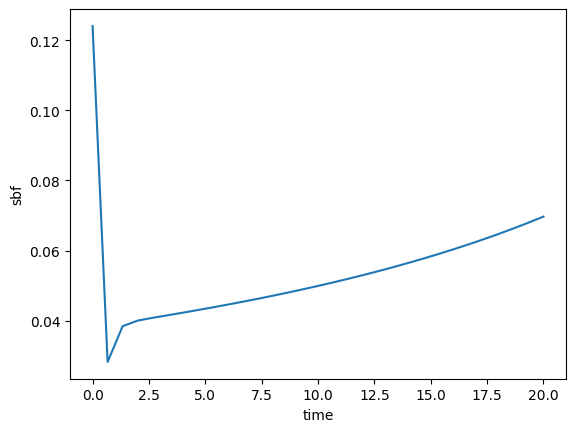

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


plot = sns.lineplot(data=mysim_results2,
                    x="time",
                    y=)

plot



---



---



---



---



#***Situation B***: *Executing time course simulations (e.g., continuous and discrete kinetic simulations)*

Similarly, first use BioSimulators' classes to describe the simulation that you would like to execute such as a flux balance analysis ([KISAO_0000437](https://www.ebi.ac.uk/ols/ontologies/kisao/terms?iri=http%3A%2F%2Fwww.biomodels.net%2Fkisao%2FKISAO%23KISAO_0000437)) simulation of a constraint-based ([SBO_0000624](https://www.ebi.ac.uk/ols/ontologies/sbo/terms?iri=http%3A%2F%2Fbiomodels.net%2FSBO%2FSBO_0000624)) [model of the central metabolism of *Escherichia coli*](../_data/Escherichia-coli-core-metabolism.xml) encoded in SBML ([EDAM:format_2585](https://www.ebi.ac.uk/ols/ontologies/edam/terms?iri=http%3A%2F%2Fedamontology.org%2Fformat_2585), SED-ML model language URN: `sbml`).

Note that we will also be manually defining an instance of Config() and TaskLog()

We will use the same workflow

In [ ]:
from biosimulators_utils.sedml.data_model import SteadyStateSimulation

In [ ]:
sim_model = Model(
        source='/content/Biosimulators_test_suite/examples/sbml-fbc/Escherichia-coli-core-metabolism/model.xml',
        language=ModelLanguage.SBML.value,        
)

In [ ]:
algorithm_type = Algorithm(
            kisao_id='KISAO_0000437',
)

In [ ]:
simulation_schema = SteadyStateSimulation(
    algorithm=algorithm_type
)

In [ ]:
sim_task = Task(
    model=sim_model,
    simulation=simulation_schema,
)

Notice that this model is constraint-based and thus will be required to have Variable outputs listed slightly differently

In [ ]:
sbml_uri = 'http://www.sbml.org/sbml/level3/version1/core'

sbml_fbc_uri = 'http://www.sbml.org/sbml/level3/version1/fbc/version2'

variables = [
    Variable(
        id='obj',
        target='/sbml:sbml/sbml:model/fbc:listOfObjectives/fbc:objective[@fbc:id="obj"]',
        target_namespaces={'sbml': sbml_uri, 'fbc': sbml_fbc_uri},
        task=sim_task,
    ),
     Variable(
        id='ex_glc',
        target='/sbml:sbml/sbml:model/sbml:listOfReactions/sbml:reaction[@id="R_EX_glc__D_e"]',
        target_namespaces={'sbml': sbml_uri, 'fbc': sbml_fbc_uri},
        task=sim_task,
    ),    
]

Can biosimulators_COPASI handle this?

In [ ]:
steady_state_sim_results, stead_state_sim_log = biosimulators_copasi.core.exec_sed_task(sim_task, variables)

ValueError: ignored

As you can see, COPASI does not support SteadyState simulation, but rather time course. Let's pick a model that does support steady state, such as COBRApy:

In [ ]:
!pip install biosimulators_cobrapy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 55.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.3/75.3 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.4/138.4 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.4/519.4 kB 34.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.8 MB/s eta 0:00:00


In [ ]:
import biosimulators_cobrapy

outputs, log = biosimulators_cobrapy.exec_sed_task(sim_task, variables)

ValueError: ignored

As you can see, sbml files are not supported as pointing material for task object. **It must be xml**.

In [ ]:
outputs, log = biosimulators_cobrapy.exec_sed_task(sim_task, variables)

In [ ]:
for variable_id, value in outputs.items():
    print('{0:}: {1:7.3f}'.format(variable_id.ljust(6, ' '), value))

obj   :   0.874
ex_glc: -10.000
